In [6]:
import numpy as np
import pandas as pd
import math
import itertools
import matplotlib.pyplot as plt

In [5]:
# ニューラルネットワークの出力層

# 入力データから中間層を経て、学習の結果を出力する。
# 学習の目的は、入力データに対する「回帰」と「分類」のどちらかに大きく分けられる。
# 回帰(regression): 入力データから求められる連続値(気温、株価など)を予測する。
# 分類(classification): 入力データが所属するカテゴリを予測する。

# ソフトマックス関数
# ニューラルネットワークによる分類を実現するとき、出力層では「ソフトマックス関数」を使う。

# ソフトマックス関数の求め方
# 0. 入力
array0 = np.asarray([0.5, 4.5, 1.8])
print("input = {0}".format(array0))
# 1. 各入力値(a)ごとに、exp(a)の値を求める。
exp0 = np.exp(array0)
print("exp(array0) = {0}".format(exp0))
# 2. 1.で成分ごとに求めた値の総和を求める。
exp0_sum = np.sum(exp0)
print("exp_sum = {0}".format(exp0_sum))
# 3. 各入力値を、2.で求めた総和で割る。
#    その結果得られた各成分が、ソフトマックス関数の出力値となる。
softmax0 = exp0 / exp0_sum
print("output = {0}".format(softmax0))


input = [0.5 4.5 1.8]
exp(array0) = [ 1.64872127 90.0171313   6.04964746]
exp_sum = 97.71550003563488
output = [0.01687267 0.9212165  0.06191083]


In [6]:
# ソフトマックス関数の実装
# ソフトマックス関数には指数関数(exp(x))が含まれる。
# xの値が大きいとexp(x)の値は爆発的に大きくなるため、割り算によって誤差が生じることがある。
# このため、上記の手順をそのまま関数として実装すると、正しく値を求められないことがある。

def bad_softmax(a):
    exp_a = np.exp(a)
    exp_sum = np.sum(exp_a)
    return exp_a / exp_sum

array1 = np.asarray([1020, 1005, 992])
softmax1 = bad_softmax(array1)

print("input = {0}".format(array1))
print("output = {0}".format(softmax1))


input = [1020 1005  992]
output = [nan nan nan]


/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [9]:
# 誤差の影響を減らすには、ソフトマックス関数の性質: softmax(a) = softmax(a + c) を利用する。
# 入力値の中で値が最大のものを M とするとき、softmax(a) = softmax(a - M) とすれば、
# 指数関数の値が小さくなり、誤差による影響を減らすことができる。

def softmax(a):
    max_a = np.max(a)
    exp_a = np.exp(a - max_a)
    exp_sum = np.sum(exp_a)
    return exp_a / exp_sum

array2 = np.asarray([1020, 1005, 992])
softmax2 = softmax(array2)

print("input = {0}".format(array2))
print("output = {0}".format(softmax2))


input = [1020 1005  992]
output = [9.99999694e-01 3.05902227e-07 6.91439799e-13]


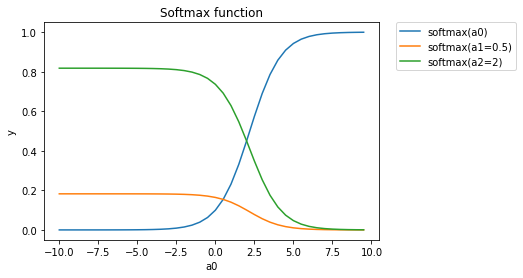

In [15]:
# ソフトマックス関数のグラフの概形

# a0, a1, a2の3つの値に対して、a1, a2の値を固定したときのソフトマックス関数:
# softmax(a0), softmax(a1), softmax(a2)のグラフを描く。

# a0の値の範囲を、-10から10まで0.5間隔で変化させる。
a0 = np.arange(-10, 10, 0.5)
x0 = a0.tolist()

# a1の値は0.5, a2の値は2とする。
a1_a2 = np.repeat([0.5, 2], a0.shape[0])
x1_x2 = a1_a2.tolist()

# a0の値に応じてソフトマックス関数を求めるため、行列を使用して値を計算する。

# x0    = [-10 -9.5 -9    ... -0.5 0   0.5 1   ... 8.5 9   9.5]
# x1_x2 = [0.5  0.5  0.5  ...  0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5
#          2    2    2    ...  2   2   2   2   ... 2   2   2]
# x0 + x1_x2 は、上の2つのリストをつないでできるリストとなる。
# 下のXは、そのリストから行数が3の行列を作っている。
X = np.asarray(x0 + x1_x2).reshape(3, a0.shape[0])

# pandas(Pythonでのデータ分析用ライブラリ)のDataFrameクラスのインスタンスを使って、
# グラフ表示用のデータを作る。
data = pd.DataFrame(X)
# DataFrameクラスのapplyメソッドにより、行列の行ごと、または列ごとに関数を適用できる。
# Xの各列にはa0, a1, a2の値が上の行から入っているため、下のようにsoftmax関数を適用すると、
# 1行目はsoftmax(a0), 2行目はsoftmax(a1), 3行目はsoftmax(a2)の計算結果が入る。
Y = np.asarray(data.apply(softmax))

# 計算結果をグラフにプロットする。
plt.plot(a0, Y[0], label="softmax(a0)")
plt.plot(a0, Y[1], label="softmax(a1=0.5)")
plt.plot(a0, Y[2], label="softmax(a2=2)")

# グラフの題名を定める。
plt.title("Softmax function")
# 凡例を表示する。
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# ラベルを表示する。
plt.xlabel("a0")
plt.ylabel("y")

# グラフを表示する。
plt.show()

In [14]:
# 分類問題における出力の求め方
# 最後の中間層の出力に対してsoftmax関数を適用し、最大値の要素に対応する項目を出力とする。

# 要素数が10の入力値をランダムに生成する。
array3 = 50 * np.random.randn(1, 10) + 100
softmax3 = softmax(array3)

print("input = {0}".format(array3))
print("output = {0}".format(softmax3))

# 最大値の要素のインデックスを取得する。
max3_original = np.argmax(array3)
max3_softmax = np.argmax(softmax3)
print("argmax(original) = {0}".format(max3_original))
print("argmax(softmax) = {0}".format(max3_softmax))


input = [[134.39582317  65.28717013  17.27790459  65.2430538  117.58613498
   92.40533918   5.75652515 110.65622736 149.38742709  27.11482776]]
output = [[3.08481418e-07 2.99035220e-37 4.22243755e-58 2.86129648e-37
  1.54480685e-14 1.79057914e-25 4.18689167e-63 1.51096201e-17
  9.99999692e-01 7.90104776e-54]]
argmax(original) = 8
argmax(softmax) = 8


In [18]:
# 入力データから出力を推測する場合には、softmax関数の適用は不要。
# 学習の際には、入力データからの出力と正解を比較したときの誤差を考慮するため、softmax関数が必要となる。

# 学習用のデータに置いて、分類問題の正解を表現する方法として、one-hot-vector がある。
# one-hot-vector は、正解に対応するインデックスの要素のみ1で、それ以外の要素が0となる。

for i in range(10):
    answer = np.asarray([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    answer[0][i] = 1
    # softmax関数の適用結果との誤差を求める。
    diff = answer - softmax3
    print("index = {0}, diff = {1}".format(i, np.sum(diff * diff)))


index = 0, diff = 1.9999987660744876
index = 1, diff = 1.9999993830373235
index = 2, diff = 1.9999993830373235
index = 3, diff = 1.9999993830373235
index = 4, diff = 1.9999993830372929
index = 5, diff = 1.9999993830373235
index = 6, diff = 1.9999993830373235
index = 7, diff = 1.9999993830373235
index = 8, diff = 1.903215799954053e-13
index = 9, diff = 1.9999993830373235
